In [37]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np

In [38]:
dir0 = Path('el_nino/')
file_sst = 'sst.mnmean.nc'

# load the data set with xarray
ds_nino = xr.open_dataset(Path(dir0, file_sst))

In [39]:
# determining the El Nino 3.4 boundary
ds_nino=ds_nino.reindex(lat=list(reversed(ds_nino['lat'])))
ds_nino34=ds_nino.sel(lon=slice(360-170,360-120),lat=slice(-5,5))
ds_nino34

<xarray.Dataset>
Dimensions:    (lat: 10, lon: 50, time: 475, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [40]:
np.shape(ds_nino34['sst'])

(475, 10, 50)

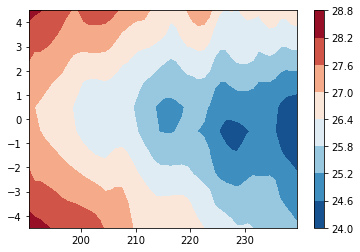

In [41]:
new_sst = np.zeros_like(ds_nino['sst'])
new_sst[:, 85:95, 190:240] = ds_nino34['sst']
plt.contourf(ds_nino34['lon'],ds_nino34['lat'],
             ds_nino34['sst'][0,:,:],cmap='RdBu_r')
# plt.contourf()
# plt.contourf(ds_nino['lon'],ds_nino['lat'],
#              np.mean(new_sst, axis=0),cmap='RdBu_r')
plt.colorbar()


In [42]:
# select years where ElNino occurred
very_strong = [["1982, 1983"],["1997, 1998"], ["2015-2016"]]
strong = [["1991, 1992"], ["2002, 2003"], ["2009, 2010"]]
weak = [["2004-2005"], ["2006, 2007"], ["2014, 2015"], ["2018-2019"]]

ds_nino8283 = ds_nino34.sel(time=slice('1982-01-01','1983-12-01'))
ds_nino8283

<xarray.Dataset>
Dimensions:    (lat: 10, lon: 50, time: 24, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 1983-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 28.6 28.5 28.38 ... 26.41 26.45 26.4
    time_bnds  (time, nbnds) datetime64[ns] 1982-01-01 1982-02-01 ... 1984-01-01
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [4]:
# El Nino years
# 1982-83, 1997-98, 2002-2003, 2004-2005, 2006-2007, 2009-2010
# 2014-2016, 2018-2019, 2023

# research question: given an input of 15 months, can we determine 
# if the period encompasses an el nino or la nina atmopsheric cycle?

# motivation:
# machine learning methodology: supervised learning with Neural Network
# feature extraction: talk to prof about PCA: input is too large, dimension reduction to extract the features
# loss function: square loss function
# evaluation method: k-fold cross validation, we will need to label the data

# data description
# input: five consecutive 3-month running mean SST anomalies (5 x space dimension)
# the region we will be extracting is the El Nino 3.4 region

# output: "el nino", "la nina", "neutral"


# criteria for el nino: five consecutive 3-month running mean SST anomalies exceed the threshold
# thershold:  threshold of +/-0.5°C
# https://www.ncei.noaa.gov/access/monitoring/enso/sst#:~:text=The%20criteria%2C%20that%20is%20often,SST%20anomalies%20exceed%20the%20threshold.
